<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python <br/><br/> Code</h2>
</div>

# Table des matières
* [Etape 1 - Importation des librairies et chargement des fichiers](#etape1)
    * [1.1 - Importation des librairies](#section1_1)
    * [1.2 - Chargement des fichiers](#section1_2)
* [Etape 2 - Entrainement de la régression logistique](#etape2)
* [Etape 3 - Prédiction](#etape3)

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3></a>
</div>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des données</h3></a>
</div>

In [2]:
#Chargement du fichier d'entraînement et suppression des NaN
dataset_entraienement = pd.read_csv("dataset_nettoye.csv", sep=",")
dataset_entraienement=dataset_entraienement.loc[~dataset_entraienement['margin_low'].isna(),:]

#Chargement des données à évaluer
dataset_test=pd.read_csv("billets_production.csv", sep=",")

In [3]:
dataset_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape2"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Entaîenment de la régression logistique</h2></a>
</div>

In [4]:
#colonnes à partir desquelles on fait la régression logistique
features=['diagonal','height_left','height_right','margin_low','margin_up','length']

#création d'une copie de data pour la régression logistique
data_logistique=dataset_entraienement[features].copy()

#split du dataset
X = data_logistique.values

#Définition de la colonne cible
y = dataset_entraienement.is_genuine.values

# initialisation et entraînement
clf = LogisticRegression(random_state=8).fit(X, y)

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape3"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Prédiction</h2></a>
</div>

In [5]:
#Création d'un dataframe prediction_logistique qui contiendra le dataset test
prediction_logistique=pd.DataFrame(dataset_test)

#incorporation des prédictions dans le dataset
prediction_logistique['prediction_logistique']=clf.predict(dataset_test[features])

#incorporation des scores deprédiction
prediction_logistique['probabilité_vrai_billet']=clf.predict_proba(dataset_test[features])[:,1]*100

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [6]:
prediction_logistique

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction_logistique,probabilité_vrai_billet
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.381288
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.065744
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.094228
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,92.355122
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,99.972789


C:\Users\adrie\AppData\Local\Temp\ipykernel_14532\3347101035.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visualisation.append(billets_prediction)


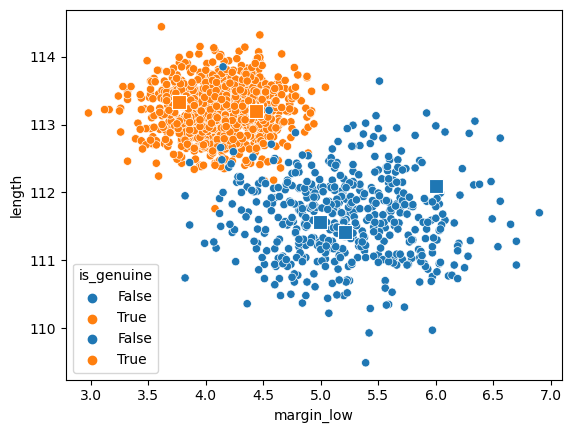

In [7]:
#visualiosation des billets
visualisation=dataset_entraienement.copy()
billets_prediction=prediction_logistique.copy().rename(columns={'prediction_logistique':'is_genuine'})
visualisation.append(billets_prediction)
sns.scatterplot(data=visualisation,x='margin_low',y='length',hue='is_genuine')
sns.scatterplot(data=billets_prediction,x='margin_low',y='length',hue='is_genuine',marker='s',s=100)
plt.show()